In [2]:
import numpy as np

In [6]:
from oceanograpy.data import ctd
from oceanograpy.maps import quickmap

In [10]:
%matplotlib widget

In [11]:
d = ctd.ctds_from_cnv_dir('../example_data/cnv/atwain_cruise/')

Loaded 10 profiles from list of Datasets.
NOTE: It seems the input data already binned -> using preexisting binning.


Joining profiles together:   0%|          | 0/10 [00:00<?, ?it/s]

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import ipywidgets as widgets
from IPython.display import display

def map(D, height=1000, width=1000, return_fig_ax=False, coast_resolution='50m', figsize=None):
    '''
    Quick map of cruise
    '''
    # These would maybe be useful for auto-scaling of the map..
    lat_span = float(D.LATITUDE.max() - D.LATITUDE.min())
    lon_span = float(D.LONGITUDE.max() - D.LONGITUDE.min())
    lat_ctr = float(0.5 * (D.LATITUDE.max() + D.LATITUDE.min()))
    lon_ctr = float(0.5 * (D.LONGITUDE.max() + D.LONGITUDE.min()))

    fig, ax = quickmap.quick_map_stere(lon_ctr, lat_ctr, height=height,
                                       width=width,
                                       coast_resolution=coast_resolution,)

    fig.canvas.header_visible = False  # Hide the figure header
    
    ax.plot(D.LONGITUDE, D.LATITUDE, '-k', transform=ccrs.PlateCarree(), alpha=0.5)
    ax.plot(D.LONGITUDE, D.LATITUDE, 'or', transform=ccrs.PlateCarree())

    if figsize:
        fig.set_size_inches(figsize)
    else:
        figsize = fig.get_size_inches()

    # Create a button to minimize the plot
    minimize_button = widgets.Button(description="Minimize")

    def minimize_plot(_):
        # Resize the figure to 2x
        fig.set_size_inches(0.1, 0.1)
        fig.canvas.draw()

    minimize_button.on_click(minimize_plot)

    # Create a button to restore full size
    org_size_button = widgets.Button(description="Original Size")

    def org_size_plot(_):
        # Resize the figure to its original size
        fig.set_size_inches(figsize)
        fig.canvas.draw()

    # Create a button to restore full size
    full_size_button = widgets.Button(description="Larger")

    def full_size_plot(_):
        # Resize the figure to its original size
        fig.set_size_inches(fig.get_size_inches()*2)
        fig.canvas.draw()

    minimize_button.on_click(minimize_plot)
    org_size_button.on_click(org_size_plot)
    full_size_button.on_click(full_size_plot)

    # Create a static text widget
    static_text = widgets.HTML(value='<p>Use the menu on the left of the figure to zoom/move around/save</p>')

    # Display both buttons and text in a horizontal box
   # display(widgets.HBox([minimize_button, org_size_button, full_size_button, static_text]))


 # Display buttons and static text horizontally, then stack with the figure vertically
    display(widgets.VBox([
        widgets.HBox([minimize_button, org_size_button, full_size_button]),
        static_text
    ]))
    
    if return_fig_ax:
        return fig, ax

# Example usage:
# map(D, height=1000, width=1000, return_fig_ax=False, coast_resolution='50m', figsize=None)


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import ipywidgets as widgets
from IPython.display import display

def map(D, height=1000, width=1000, return_fig_ax=False, coast_resolution='50m', figsize=None):
    '''
    Quick map of cruise
    '''
    # These would maybe be useful for auto-scaling of the map..
    lat_span = float(D.LATITUDE.max() - D.LATITUDE.min())
    lon_span = float(D.LONGITUDE.max() - D.LONGITUDE.min())
    lat_ctr = float(0.5 * (D.LATITUDE.max() + D.LATITUDE.min()))
    lon_ctr = float(0.5 * (D.LONGITUDE.max() + D.LONGITUDE.min()))

    fig, ax = quickmap.quick_map_stere(lon_ctr, lat_ctr, height=height,
                                       width=width,
                                       coast_resolution=coast_resolution,)

    fig.canvas.header_visible = False  # Hide the figure header
    
    ax.plot(D.LONGITUDE, D.LATITUDE, '-k', transform=ccrs.PlateCarree(), alpha=0.5)
    ax.plot(D.LONGITUDE, D.LATITUDE, 'or', transform=ccrs.PlateCarree())

    if figsize:
        fig.set_size_inches(figsize)
    else:
        figsize = fig.get_size_inches()

    # Create a button to minimize the plot
    minimize_button = widgets.Button(description="Minimize")

    def minimize_plot(_):
        # Resize the figure to 2x
        fig.set_size_inches(0.1, 0.1)
        fig.canvas.draw()

    minimize_button.on_click(minimize_plot)

    # Create a button to restore full size
    org_size_button = widgets.Button(description="Original Size")

    def org_size_plot(_):
        # Resize the figure to its original size
        fig.set_size_inches(figsize)
        fig.canvas.draw()

    # Create a button to restore full size
    full_size_button = widgets.Button(description="Larger")

    def full_size_plot(_):
        # Resize the figure to its original size
        fig.set_size_inches(fig.get_size_inches()*2)
        fig.canvas.draw()

    minimize_button.on_click(minimize_plot)
    org_size_button.on_click(org_size_plot)
    full_size_button.on_click(full_size_plot)

    # Create a static text widget
    static_text = widgets.HTML(value='<p>Use the menu on the left of the figure to zoom/move around/save</p>')

    # Display both buttons and text with decreased vertical spacing
    display(
        widgets.HBox([minimize_button, org_size_button, full_size_button, static_text], layout=widgets.Layout(margin='0 0 5px 0', align_items='center')))
    
    if return_fig_ax:
        return fig, ax

# Example usage:
# map(D, height=1000, width=1000, return_fig_ax=False, coast_resolution='50m', figsize=None)


In [64]:
plt.close('all')

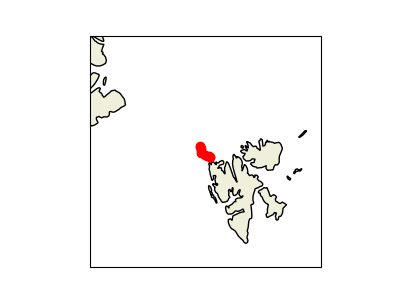

In [65]:
map(d)